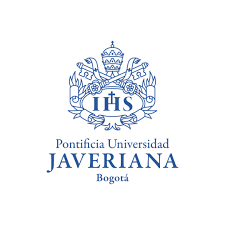
***Pontificia Universidad Javeriana***
# **Procesamiento de Alto Volumen de Datos**

### Taller: **SQL con PySpark**

Autor: Paula Andrea Velasquez Romero

Fecha: 5/05/2025

**Objetivo**: Uso de SQL como motor de Consultas sobre DataFrame Spark.

Proporciona una abstracción de programación denominada DataFrames y también puede actuar como motor de consulta SQL distribuido. Permite ejecutar consultas Hadoop Hive no modificadas hasta 100 veces más rápido en implementaciones y datos existentes. También proporciona una potente integración con el resto del ecosistema Spark (por ejemplo, integrando el procesamiento de consultas SQL con MLib).

Spark SQL aporta soporte nativo para SQL a Spark y agiliza el proceso de consulta de datos almacenados tanto en RDD como en fuentes externas. Spark SQL difumina convenientemente las líneas entre RDDs y tablas relacionales. Spark SQL permite:

- Importar datos relacionales de archivos Parquet y tablas Hive
- Ejecutar consultas SQL sobre datos importados y RDDs existentes
- Escribir fácilmente RDDs en tablas Hive o archivos Parquet.

Spark SQL también incluye un optimizador basado en costes, almacenamiento en columnas y generación de código para agilizar las consultas. Al mismo tiempo, escala a miles de nodos y consultas de varias horas utilizando el motor Spark, que proporciona una tolerancia total a fallos a mitad de consulta, sin tener que preocuparse de utilizar un motor diferente para los datos históricos.

____________________________________________________

**1.- Crear sessión PySpark SQL**



```
from pyspark.sql.functions import col, when, avg
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("TallerSQL").getOrCreate()
```



In [1]:
from pyspark.sql.functions import col, when, avg
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("TallerSQL").getOrCreate()

**2.-Crear DataFrame Spark:**
- Al menos 15 registros: nombres y edades entre (10 y 70 años)**
- Mostrar dataframe

```
df00 = spark.createDataFrame(
        [
            ("nombre1", 22),
            ("nombre2", 31),
        ],
        ["Nombre", "Edad"],
)
```

In [27]:
df00 = spark.createDataFrame(
        [
            ("nombre1", 22),
            ("nombre2", 31),
            ("nombre3", 10),
            ("nombre4", 31),
            ("nombre5", 10),
            ("nombre6", 31),
            ("nombre7", 10),
            ("nombre8", 56),
            ("nombre9", 67),
            ("nombre10", 70),
            ("nombre11", 50),
            ("nombre12", 20),
            ("nombre13", 25),
            ("nombre14", 45),
            ("nombre15", 18),
        ],
        ["Nombre", "Edad"],
)
df00.show(15)

+--------+----+
|  Nombre|Edad|
+--------+----+
| nombre1|  22|
| nombre2|  31|
| nombre3|  10|
| nombre4|  31|
| nombre5|  10|
| nombre6|  31|
| nombre7|  10|
| nombre8|  56|
| nombre9|  67|
|nombre10|  70|
|nombre11|  50|
|nombre12|  20|
|nombre13|  25|
|nombre14|  45|
|nombre15|  18|
+--------+----+



**3.- Agregue una nueva columna "Etapa":**
- Niño: menores de 12 años
- Adolescente: menores de 19 años
- Adulto: mayor que 19 años
- Mostrar dataframe



```
df1 = df.withColumn(
    "nombreColumna",
    when(col("nom") < 100, "vivo")
    .when(col("nom").between(100, 180), "novivo")
    .otherwise("nacer"),
)
```

In [28]:


df1 = df00.withColumn(
    "Etapa",
    when(col("Edad") < 12, "Niño")
    .when(col("Edad") < 19, "Adolescente")
    .otherwise("Adulto"),
)
df1.show(15)


+--------+----+-----------+
|  Nombre|Edad|      Etapa|
+--------+----+-----------+
| nombre1|  22|     Adulto|
| nombre2|  31|     Adulto|
| nombre3|  10|       Niño|
| nombre4|  31|     Adulto|
| nombre5|  10|       Niño|
| nombre6|  31|     Adulto|
| nombre7|  10|       Niño|
| nombre8|  56|     Adulto|
| nombre9|  67|     Adulto|
|nombre10|  70|     Adulto|
|nombre11|  50|     Adulto|
|nombre12|  20|     Adulto|
|nombre13|  25|     Adulto|
|nombre14|  45|     Adulto|
|nombre15|  18|Adolescente|
+--------+----+-----------+



**4.- Filtre los datos que son solo 'Adolescentes y Adultos'**


```
dfA.where(col("columna").isin(["vivo", "novivo"])).show()
```

In [29]:


df2 = df1.where(col("Etapa").isin(["Adolescente", "Adulto"]))
df2.show()


+--------+----+-----------+
|  Nombre|Edad|      Etapa|
+--------+----+-----------+
| nombre1|  22|     Adulto|
| nombre2|  31|     Adulto|
| nombre4|  31|     Adulto|
| nombre6|  31|     Adulto|
| nombre8|  56|     Adulto|
| nombre9|  67|     Adulto|
|nombre10|  70|     Adulto|
|nombre11|  50|     Adulto|
|nombre12|  20|     Adulto|
|nombre13|  25|     Adulto|
|nombre14|  45|     Adulto|
|nombre15|  18|Adolescente|
+--------+----+-----------+



### Consultas al Dataframe por SQL

**5.- Consulte el promedio de la columna Edad**



```
spark.sql("select avg(Edad) from {dfB}", dfB=dfB).show()
```

In [30]:
dfB = df1
spark.sql("select avg(Edad) from {dfB}", dfB=dfB).show()


+-----------------+
|        avg(Edad)|
+-----------------+
|33.06666666666667|
+-----------------+



**6.- Consulte el promedio de la columna Edad por Etapa**



```
spark.sql("select colStage, avg(edad) from {dfH} group by colStage", dfH=dfH).show()
```



In [24]:
dfH = df1
spark.sql("select Etapa, avg(Edad) from {dfH} group by Etapa", dfH=dfH).show()


+-----------+-----------------+
|      Etapa|        avg(Edad)|
+-----------+-----------------+
|       Niño|             10.0|
|     Adulto|40.72727272727273|
|Adolescente|             18.0|
+-----------+-----------------+



**7.- Persistencia: crear un tabla para ser facilmente accesible por el API SQL**

- Crear la tabla
- Mostrar la tabla creada
- Insertar al menos 4 nuevos registros
- Mostrar nueva tabla

```
dfG.write.saveAsTable("nombreTabla")

spark.sql("select * from nombreTabla").show()

spark.sql("INSERT INTO nombreTabla VALUES ('nNombre', 14, 'vivo')")
```

In [35]:
dfG.write.saveAsTable("nombreTabla")

In [39]:
spark.sql("select * from nombreTabla").show()

spark.sql("INSERT INTO nombreTabla VALUES ('nombre16', 28, 'Adulto')")
spark.sql("INSERT INTO nombreTabla VALUES ('nombre17', 17, 'Adolescente')")
spark.sql("INSERT INTO nombreTabla VALUES ('nombre18', 10, 'Niño')")
spark.sql("INSERT INTO nombreTabla VALUES ('nombre19', 42, 'Adulto')")

+--------+----+-----------+
|  Nombre|Edad|      Etapa|
+--------+----+-----------+
| nombre8|  56|     Adulto|
| nombre9|  67|     Adulto|
|nombre10|  70|     Adulto|
|nombre11|  50|     Adulto|
|nombre12|  20|     Adulto|
|nombre13|  25|     Adulto|
|nombre14|  45|     Adulto|
|nombre15|  18|Adolescente|
| nombre1|  22|     Adulto|
| nombre2|  31|     Adulto|
| nombre3|  10|       Niño|
| nombre4|  31|     Adulto|
| nombre5|  10|       Niño|
| nombre6|  31|     Adulto|
| nombre7|  10|       Niño|
|nombre17|  17|Adolescente|
|nombre19|  42|     Adulto|
|nombre16|  28|     Adulto|
|nombre18|  10|       Niño|
| nNombre|  14|       vivo|
+--------+----+-----------+
only showing top 20 rows



DataFrame[]

**8.- Consulte en la tabla los adolescentes:**



```
spark.sql("select * from TablaNombre where NTapaS='vivos'").show()
```

In [41]:
spark.sql("select * from nombreTabla where Etapa='Adolescente'").show()


+--------+----+-----------+
|  Nombre|Edad|      Etapa|
+--------+----+-----------+
|nombre15|  18|Adolescente|
|nombre17|  17|Adolescente|
|nombre17|  17|Adolescente|
+--------+----+-----------+



## RDD Spark

**9.- Carge el Fichero [texto.txt](https://github.com/corredor-john/ExploratoryDataAnalisys/blob/f5444496cfbb1a2c2ec2c71592c321e557c0e5ae/Texto/SMSSpamCollection.txt) para ser leido por el contexto SPARK**

- Descargue el fichero
- Crear el contexto y cargue el fichero



```
fichero = spark.sparkContext.textFile("texto.txt")

counts = (
    fichero.flatMap(lambda linea: linea.split(" "))
    .map(lambda palabra: (palabra, 1))
    .reduceByKey(lambda a, b: a + b)
)
```



In [43]:
!wget https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/f5444496cfbb1a2c2ec2c71592c321e557c0e5ae/Texto/SMSSpamCollection.txt
fichero = spark.sparkContext.textFile("SMSSpamCollection.txt")
counts = (
    fichero.flatMap(lambda linea: linea.split(" "))
    .map(lambda palabra: (palabra, 1))
    .reduceByKey(lambda a, b: a + b)
)
counts.collect()

--2025-05-05 13:54:10--  https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/f5444496cfbb1a2c2ec2c71592c321e557c0e5ae/Texto/SMSSpamCollection.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 477907 (467K) [text/plain]
Saving to: ‘SMSSpamCollection.txt.1’

SMSSpamCollection.t 100%[===================>] 466.71K  --.-KB/s    in 0.009s  

2025-05-05 13:54:10 (49.1 MB/s) - ‘SMSSpamCollection.txt.1’ saved [477907/477907]



[('ham\tGo', 4),
 ('jurong', 1),
 ('point,', 1),
 ('world', 17),
 ('la', 2),
 ('buffet...', 1),
 ('Cine', 1),
 ('got', 204),
 ('wat...', 12),
 ('ham\tOk', 86),
 ('lar...', 18),
 ('Joking', 1),
 ('entry', 25),
 ('comp', 10),
 ('to', 2145),
 ('FA', 4),
 ('Cup', 3),
 ('21st', 3),
 ('2005.', 3),
 ('Text', 37),
 ('receive', 34),
 ('question(std', 2),
 ('txt', 75),
 ('apply', 15),
 ("08452810075over18's", 2),
 ('ham\tU', 47),
 ('say', 72),
 ('so', 295),
 ('U', 236),
 ('c', 44),
 ('then', 146),
 ('ham\tNah', 6),
 ('I', 1074),
 ('around', 53),
 ('here', 73),
 ('though', 15),
 ('spam\tFreeMsg', 5),
 ('Hey', 10),
 ('3', 49),
 ("week's", 4),
 ('and', 858),
 ('no', 124),
 ('word', 22),
 ('back!', 2),
 ('like', 224),
 ('fun', 22),
 ('you', 1625),
 ('up', 243),
 ('for', 650),
 ('it', 396),
 ('still?', 2),
 ('Tb', 1),
 ('ok!', 2),
 ('XxX', 2),
 ('send,', 2),
 ('ham\tEven', 4),
 ('brother', 9),
 ('speak', 17),
 ('with', 351),
 ('me.', 97),
 ('They', 20),
 ('me', 561),
 ('aids', 1),
 ('per', 55),
 ('re

## **10.- Conclusiones: redacte sus conclusiones por cada paso y conclusión final de Cierre**

- El tiempo fue suficiente, Se logró cubrir los objetivos del taller y explorar las principales funcionalidades de Spark SQL y RDDs en el tiempo asignado.

- Spark SQL facilita el análisis de datos, permite usar la familiaridad de SQL para realizar consultas sobre DataFrames de Spark, lo que simplifica el análisis de datos distribuidos.

- Spark es versátil, se puede usar tanto para procesar datos estructurados con DataFrames y SQL como para datos no estructurados con RDDs.

- La persistencia de datos mejora la eficiencia, crear tablas persistentes facilita el acceso y la reutilización de los datos en consultas SQL.

- Se cumplió el objetivo de usar SQL como motor de consultas sobre DataFrames de Spark. Se crearon DataFrames, se realizaron consultas SQL sobre ellos, y se persistieron en tablas para un acceso eficiente. Esto demuestra la capacidad de Spark SQL para integrar el lenguaje SQL con el ecosistema Spark, permitiendo un análisis de datos distribuidos de manera familiar y eficiente.

- Spark SQL es una herramienta impresionante que simplifica el análisis de datos a gran escala. Su capacidad para combinar la familiaridad de SQL con la potencia de Spark abre un abanico de posibilidades para explorar y obtener información valiosa de conjuntos de datos complejos.